# DAT210x - Programming with Python for DS

## Module5- Lab2

Start by importing whatever you need to import in order to make this lab work:

In [2]:
import pandas as pd
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import matplotlib# .. your code here ..

matplotlib.style.use('ggplot') # Look Pretty

### CDRs

A [call detail record](https://en.wikipedia.org/wiki/Call_detail_record) (CDR) is a data record produced by a telephone exchange or other telecommunications equipment that documents the details of a telephone call or other telecommunications transaction (e.g., text message) that passes through that facility or device.

The record contains various attributes of the call, such as time, duration, completion status, source number, and destination number. It is the automated equivalent of the paper toll tickets that were written and timed by operators for long-distance calls in a manual telephone exchange.

The dataset we've curated for you contains call records for 10 people, tracked over the course of 3 years. Your job in this assignment is to find out where each of these people likely live and where they work at!

Start by loading up the dataset and taking a peek at its head. You can convert date-strings to real date-time objects using `pd.to_datetime`, and the times using `pd.to_timedelta`:

In [9]:
df = pd.read_csv('Datasets/CDR.csv')# .. your code here ..
df.CallDate = pd.to_datetime(df.CallDate)
df.CallTime = pd.to_timedelta(df.CallTime)
print(df.dtypes)

In                     int64
Out                    int64
Direction             object
CallDate      datetime64[ns]
CallTime     timedelta64[ns]
DOW                   object
Duration              object
TowerID               object
TowerLat             float64
TowerLon             float64
dtype: object


Create a distinct list of `In` phone numbers (people) and store the values in a regular python list. Make sure the numbers appear in your list in the same order they appear in your dataframe; but only keep a single copy of each number. [This link](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.tolist.html) might also be helpful.

In [13]:
in_samples = []
for num in df.In:
    if num not in in_samples:
        in_samples.append(num)

print(in_samples)# .. your code here ..
print(df.In)

[4638472273, 1559410755, 4931532174, 2419930464, 1884182865, 3688089071, 4555003213, 2068627935, 2894365987, 8549533077]
0        4638472273
1        4638472273
2        4638472273
3        4638472273
4        4638472273
5        4638472273
6        4638472273
7        1559410755
8        1559410755
9        1559410755
10       1559410755
11       1559410755
12       1559410755
13       1559410755
14       1559410755
15       1559410755
16       1559410755
17       1559410755
18       1559410755
19       1559410755
20       1559410755
21       1559410755
22       1559410755
23       1559410755
24       1559410755
25       1559410755
26       1559410755
27       1559410755
28       1559410755
29       1559410755
            ...    
53158    2068627935
53159    2068627935
53160    2068627935
53161    2068627935
53162    2068627935
53163    2068627935
53164    2068627935
53165    2894365987
53166    2894365987
53167    2894365987
53168    2894365987
53169    2894365987
53170    2894365987

Create a slice named `user1` that filters to _only_ include dataset records where the `In` feature (user's phone number) is equal to the first number on your unique list above, i.e., the very first number in the dataset:

In [19]:
user1 = df.loc[df['In'] == in_samples[0]]# .. your code here ..
print(user1)

               In         Out Direction   CallDate        CallTime  DOW  \
0      4638472273  2666307251  Incoming 2010-12-25 07:16:24.736813  Sat   
1      4638472273  1755442610  Incoming 2010-12-25 21:18:30.053710  Sat   
2      4638472273  5481755331  Incoming 2010-12-25 14:52:42.878016  Sat   
3      4638472273  1755442610  Incoming 2010-12-25 16:02:09.001913  Sat   
4      4638472273  2145623768  Incoming 2010-12-25 15:28:35.028554  Sat   
5      4638472273  2946222380  Incoming 2010-12-25 11:38:17.275327  Sat   
6      4638472273  7841019020    Missed 2010-12-25 10:38:35.924232  Sat   
71     4638472273  5912117253  Incoming 2010-12-26 14:34:27.530327  Sun   
72     4638472273  2145623768  Incoming 2010-12-26 20:45:00.306964  Sun   
73     4638472273  4551601645    Missed 2010-12-26 16:03:43.841914  Sun   
74     4638472273  6250348072  Incoming 2010-12-26 18:30:28.968794  Sun   
75     4638472273  8180005891  Incoming 2010-12-26 19:19:23.380844  Sun   
76     4638472273  792222

Let's go ahead and plot all the call locations:

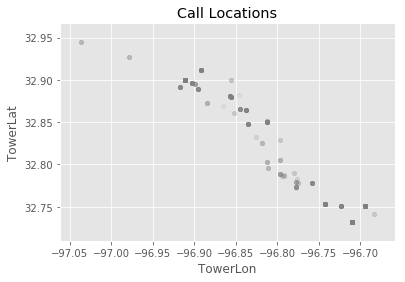

In [20]:
user1.plot.scatter(x='TowerLon', y='TowerLat', c='gray', alpha=0.1, title='Call Locations')
plt.show()

INFO: The locations map above should be too "busy" to really wrap your head around. This is where domain expertise comes into play. Your intuition can direct you by knowing people are likely to behave differently on weekends vs on weekdays:

#### On Weekends
1. People probably don't go into work
1. They probably sleep in late on Saturday
1. They probably run a bunch of random errands, since they couldn't during the week
1. They should be home, at least during the very late hours, e.g. 1-4 AM

#### On Weekdays
1. People probably are at work during normal working hours
1. They probably are at home in the early morning and during the late night
1. They probably spend time commuting between work and home everyday

Add more filters to the `user1` slice you created. Add bitwise logic so that you only examine records that _came in_ on weekends (sat/sun):

In [21]:
user1 = user1.loc[(user1['DOW'] == 'Sat') | (user1['DOW'] == 'Sun')]
print(user1)# .. your code here ..

               In         Out Direction   CallDate        CallTime  DOW  \
0      4638472273  2666307251  Incoming 2010-12-25 07:16:24.736813  Sat   
1      4638472273  1755442610  Incoming 2010-12-25 21:18:30.053710  Sat   
2      4638472273  5481755331  Incoming 2010-12-25 14:52:42.878016  Sat   
3      4638472273  1755442610  Incoming 2010-12-25 16:02:09.001913  Sat   
4      4638472273  2145623768  Incoming 2010-12-25 15:28:35.028554  Sat   
5      4638472273  2946222380  Incoming 2010-12-25 11:38:17.275327  Sat   
6      4638472273  7841019020    Missed 2010-12-25 10:38:35.924232  Sat   
71     4638472273  5912117253  Incoming 2010-12-26 14:34:27.530327  Sun   
72     4638472273  2145623768  Incoming 2010-12-26 20:45:00.306964  Sun   
73     4638472273  4551601645    Missed 2010-12-26 16:03:43.841914  Sun   
74     4638472273  6250348072  Incoming 2010-12-26 18:30:28.968794  Sun   
75     4638472273  8180005891  Incoming 2010-12-26 19:19:23.380844  Sun   
76     4638472273  792222

Further filter `user1` down for calls that came in either before 6AM OR after 10pm (22:00:00). Even if you didn't convert your times from string objects to timedeltas, you can still use `<` and `>` to compare the string times as long as you code them as [military time strings](https://en.wikipedia.org/wiki/24-hour_clock), eg: "06:00:00", "22:00:00": 

You may also want to review the Data Manipulation section for this. Once you have your filtered slice, print out its length:

In [23]:
user1 = user1[(user1.CallTime < "06:00:00") | (user1.CallTime > "22:00:00")]

print (user1)# .. your code here ..

               In         Out Direction   CallDate        CallTime  DOW  \
940    4638472273  6150928001  Incoming 2011-01-08 22:22:33.693878  Sat   
1875   4638472273  2145623768  Incoming 2011-01-22 22:21:27.466908  Sat   
6949   4638472273  5621270003    Missed 2011-04-09 22:59:23.206408  Sat   
7468   4638472273  7756914135  Incoming 2011-04-17 05:15:40.205917  Sun   
9753   4638472273  7922223441  Incoming 2011-05-21 05:08:20.121145  Sat   
13951  4638472273  7428841195    Missed 2011-07-23 22:56:02.014834  Sat   
17515  4638472273  2666307251  Incoming 2011-09-11 05:44:15.432523  Sun   
21638  4638472273  6150928001  Incoming 2011-11-13 05:10:41.954161  Sun   
22045  4638472273  6022767590    Missed 2011-11-19 22:59:53.166951  Sat   
22502  4638472273  5621270003  Incoming 2011-11-26 22:10:48.879076  Sat   
27866  4638472273  2946222380    Missed 2012-02-12 22:48:34.319367  Sun   
31975  4638472273  1755442610  Incoming 2012-04-14 05:42:32.004437  Sat   
32605  4638472273  775691

Visualize the dataframe with a scatter plot as a sanity check. Since you're [familiar with maps](https://en.wikipedia.org/wiki/Geographic_coordinate_system#Geographic_latitude_and_longitude), you know well that your X-Coordinate should be Longitude, and your Y coordinate should be the tower Latitude. Check the dataset headers for proper column feature names.
 
At this point, you don't yet know exactly where the user is located just based off the cell phone tower position data; but considering the below are for Calls that arrived in the twilight hours of weekends, it's likely that wherever they are bunched up is probably near where the caller's residence:

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(user1.TowerLon,user1.TowerLat, c='g', marker='o', alpha=0.2)
ax.set_title('Weekend Calls (<6am or >10p)')

Run K-Means with a `K=1`. There really should only be a single area of concentration. If you notice multiple areas that are "hot" (multiple areas the user spends a lot of time at that are FAR apart from one another), then increase `K=2`, with the goal being that one of the centroids will sweep up the annoying outliers; and the other will zero in on the user's approximate home location. Or rather the location of the cell tower closest to their home.....

Be sure to only feed in Lat and Lon coordinates to the KMeans algorithm, since none of the other data is suitable for your purposes. Since both Lat and Lon are (approximately) on the same scale, no feature scaling is required. Print out the centroid locations and add them onto your scatter plot. Use a distinguishable marker and color.

Hint: Make sure you graph the CORRECT coordinates. This is part of your domain expertise.

In [29]:
kmeans = KMeans(n_clusters = 2)
kmeans = KMeans(n_clusters = 2)

user1 = pd.concat([user1.TowerLon, user1.TowerLat], axis = 1)

labels = kmeans.fit_predict(user1)



centroids = kmeans.cluster_centers_

ax.scatter(x = centroids[:, 0], y = centroids[:, 1], c = 'r', marker = 'x', s = 100)



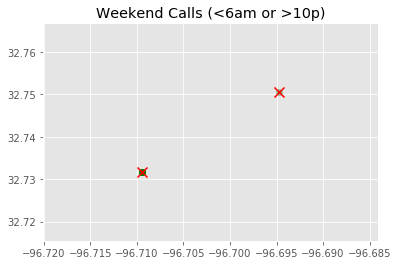

In [30]:
plt.show()

Now that you have a system in place, repeat the above steps for all 10 individuals in the dataset, being sure to record their approximate home locations. You might want to use a for-loop, unless you enjoy copying and pasting:

In [32]:
locations = []

for i in range(10):

	user = df[(df.In == in_samples[i])]

	user.plot.scatter(x='TowerLon', y='TowerLat', c='purple', alpha=0.12, title='Call Locations', s = 30)

	user = user[(user.DOW == 'Sat') | (user.DOW == 'Sun')]

	user = user[(user.CallTime < "06:00:00") | (user.CallTime > "22:00:00")]

	fig = plt.figure()

	ax = fig.add_subplot(111)

	ax.scatter(user.TowerLon, user.TowerLat, c='g', marker='o', alpha=0.2)

	ax.set_title('Weekend Calls (<6am or >10p)')

	kmeans = KMeans(n_clusters = 2)

	user = pd.concat([user.TowerLon, user.TowerLat], axis = 1)

	labels = kmeans.fit_predict(user)



	centroids = kmeans.cluster_centers_

	ax.scatter(x = centroids[:, 0], y = centroids[:, 1], c = 'r', marker = 'x', s = 100)

	locations.append(centroids)

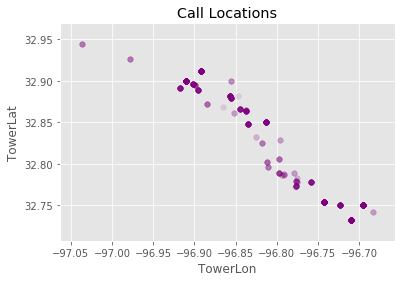

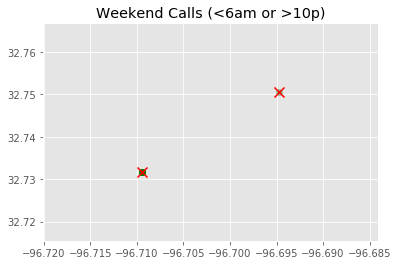

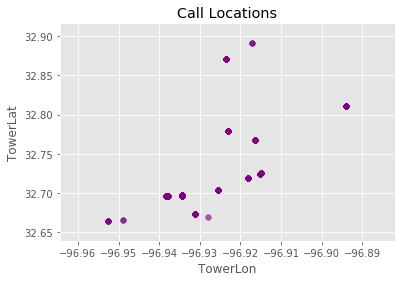

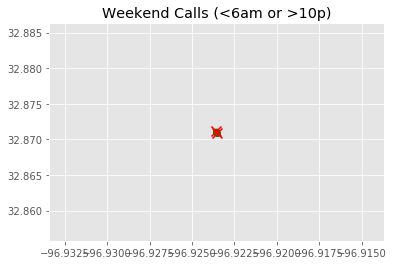

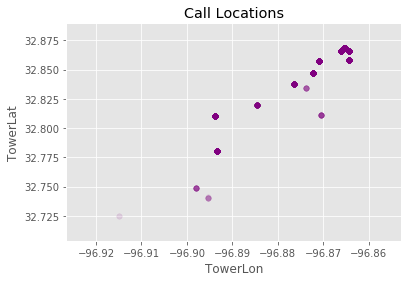

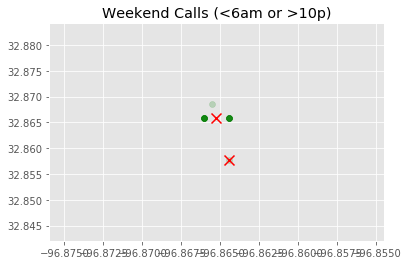

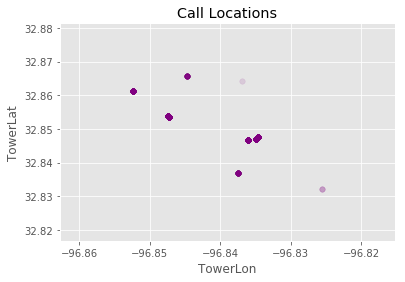

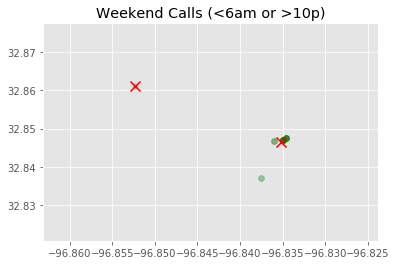

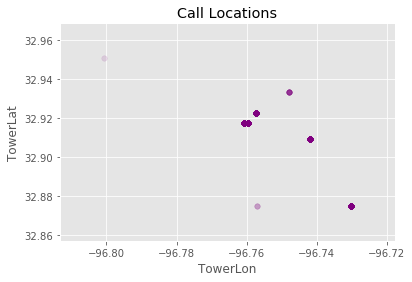

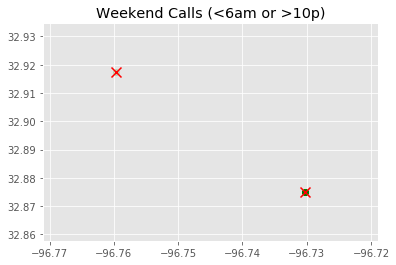

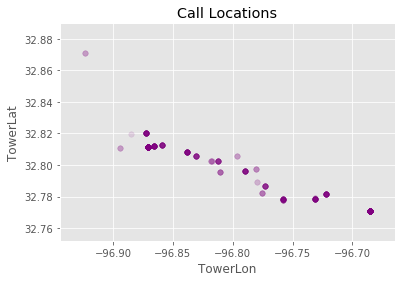

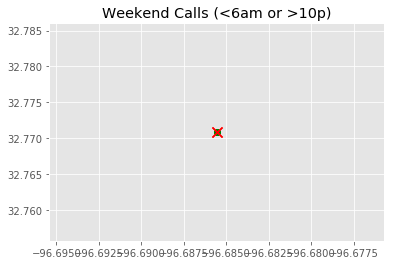

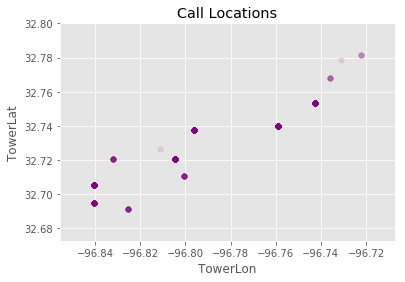

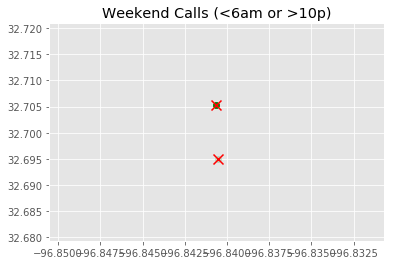

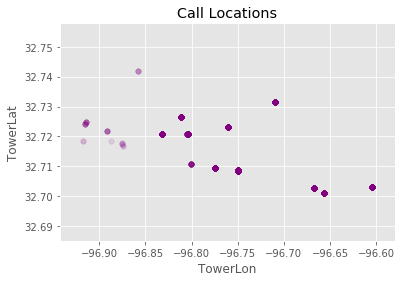

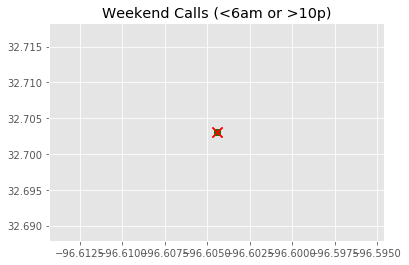

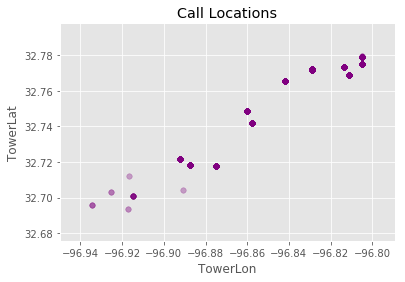

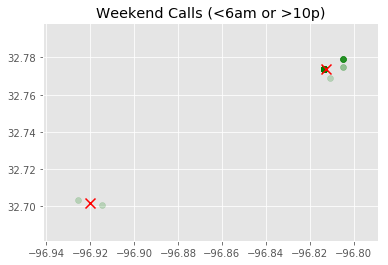

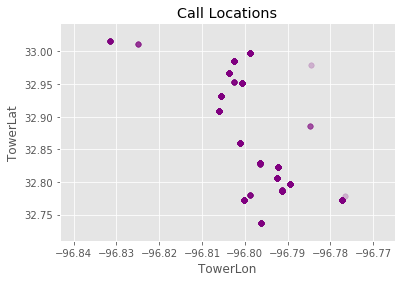

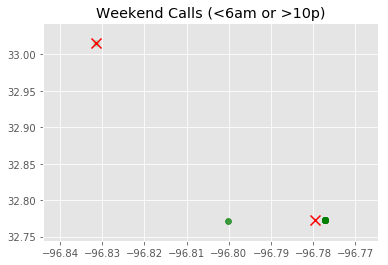

In [33]:
plt.show()